In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 

# Load Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup (Datetime & 'job_skills' to list type)

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# Converts column to list type - Allows for .explode()
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list) 

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

## Customizing our chart from 12 (Trending Skills)

In [22]:
# Creates a new column for the month no. of the job posting
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode Job Skills column
df_DA_explode = df_DA.explode('job_skills')

# Pivoting the exploded df
df_DA_pivot = (df_DA_explode
               .pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)
               )

df_DA_pivot.loc['Total'] = df_DA_pivot.sum() # Creating a Total row in the pivot table 

# # Sorting in descending order of Total, and getting the index of those values
# df_DA_pivot.loc['Total'].sort_values(ascending=False).index 

# Actually assigning the sorted pivot table to df_DA_pivot
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index] 

df_DA_pivot = df_DA_pivot.drop('Total') # Dropping the 'Total' row now that we dont need it anymore

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot


job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


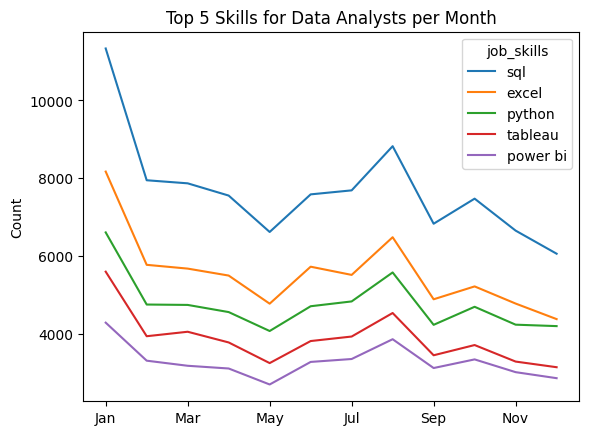

In [26]:
# Plotting Line Graph - ORIGINAL
df_DA_pivot.iloc[:, :5].plot(kind='line') # All rows, first 5 columns from dataframe
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

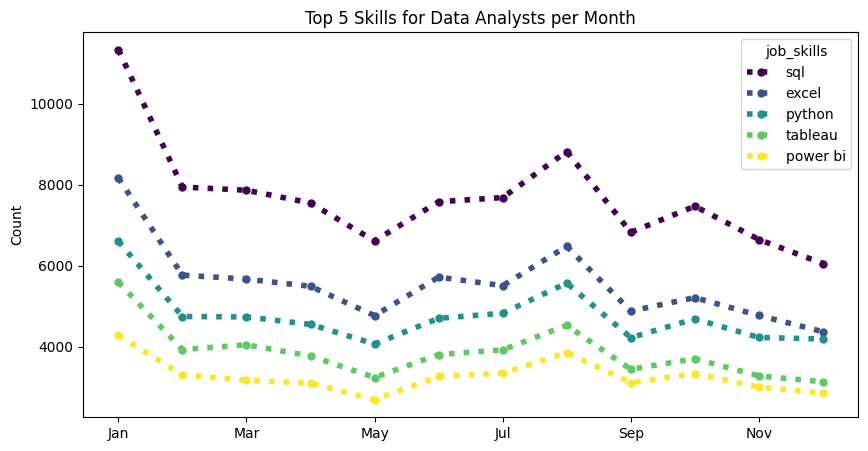

In [34]:
# Plotting Line Graph - CUSTOMIZED
df_DA_pivot.iloc[:, :5].plot( # All rows, first 5 columns from dataframe
    kind='line', linewidth = 4, linestyle = ':', colormap = 'viridis',
    marker = 'o', markersize = 5,figsize = (10,5)
    ) 
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

## Customizing our Scatter Plot from lesson 15

In [38]:
# Explode out the skills column
df_exploded = df_DA.explode('job_skills')

# We use .agg bc we have multiple aggregation functions
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg', 'median'), # 1st aggregation (median)
    skill_count = ('job_skills', 'count') # 2nd aggregation (count)
)

skill_count = 20 # Choosing 20 so we get some label overlaps on the plot
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats


,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


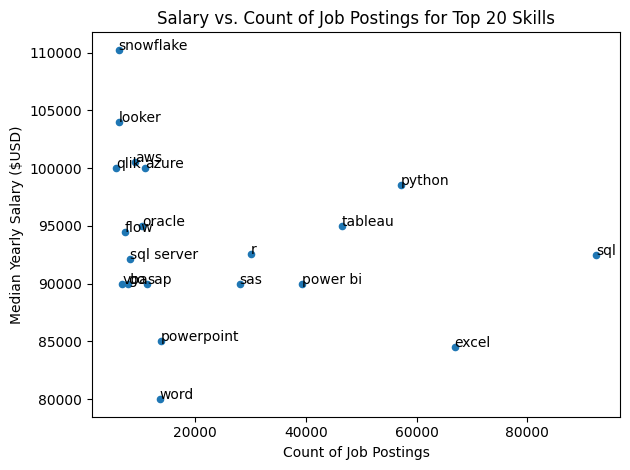

In [45]:
# Original Plot
skill_stats.plot(kind='scatter', x = 'skill_count', y = 'median_salary')

for i, txt in enumerate(skill_stats.index): # .index will get the index of the skill_stats df (basically a list of the job skills)
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt) # plt.text(x, y, text for label)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

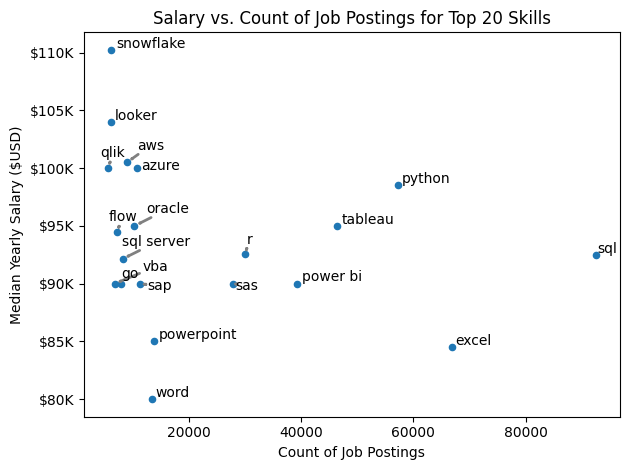

In [61]:
# Customized Plot 
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x = 'skill_count', y = 'median_salary') # Basic plot

# Adding text labels and making sure they dont overlap
texts = []
for i, txt in enumerate(skill_stats.index): # .index will get the index of the skill_stats df (basically a list of the job skills)
   texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)) # plt.text(x, y, text for label)
adjust_text(texts, arrowprops = dict(arrowstyle = "->", color = 'gray', lw = 2))

# Editting the y axis tick labels
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

In [ ]:
for i, skill in enumerate(skill_stats.index):
    print (i, skill, skill_stats['median_salary'][i])